In [ ]:
import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# specify the path to the .zip file
test1_path = "/content/drive/MyDrive/CatVsDog Classfction/test1.zip"
train_path = "/content/drive/MyDrive/CatVsDog Classfction/train.zip"

# open the .zip file in read mode
with zipfile.ZipFile(test1_path, 'r') as zip_ref:
    # extract all files to a directory named 'extracted'
    zip_ref.extractall('extracted')



with zipfile.ZipFile(train_path, 'r') as zip_ref:
    # extract all files to a directory named 'extracted'
    zip_ref.extractall('extracted')
print("All files have been extracted to the 'extracted' directory.")

All files have been extracted to the 'extracted' directory.


In [ ]:
import os
import shutil

# set the path to the directory containing the images
data_path = "/content/extracted/train"

# create subdirectories for cats and dogs
os.mkdir(os.path.join(data_path, "cat"))
os.mkdir(os.path.join(data_path, "dog"))

# move cat images to the cat subdirectory and dog images to the dog subdirectory
for filename in os.listdir(data_path):
    if filename.startswith("cat"):
        shutil.move(os.path.join(data_path, filename), os.path.join(data_path, "cat"))
    elif filename.startswith("dog"):
        shutil.move(os.path.join(data_path, filename), os.path.join(data_path, "dog"))

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the paths of the original train directory
train_dir = '/content/extracted/train'

# Set the paths of the new train and validation directories
train_new_dir = '/content/Train'
valid_dir = '/content/validation'

# Get the file names for each class
cat_files = os.listdir(os.path.join(train_dir, 'cat'))
dog_files = os.listdir(os.path.join(train_dir, 'dog'))

# Split the file names for each class into new train and validation sets
cat_train_files, cat_valid_files = train_test_split(cat_files, test_size=0.2, random_state=42)
dog_train_files, dog_valid_files = train_test_split(dog_files, test_size=0.2, random_state=42)

# Copy the cat train files to the new train directory
for file_name in cat_train_files:
    src_path = os.path.join(train_dir, 'cat', file_name)
    dst_path = os.path.join(train_new_dir, 'cat', file_name)
    if src_path != dst_path:
        shutil.copy(src_path, dst_path)

# Copy the dog train files to the new train directory
for file_name in dog_train_files:
    src_path = os.path.join(train_dir, 'dog', file_name)
    dst_path = os.path.join(train_new_dir, 'dog', file_name)
    if src_path != dst_path:
        shutil.copy(src_path, dst_path)

# Copy the cat validation files to the validation directory
for file_name in cat_valid_files:
    src_path = os.path.join(train_dir, 'cat', file_name)
    dst_path = os.path.join(valid_dir, 'cat', file_name)
    if src_path != dst_path:
        shutil.copy(src_path, dst_path)

# Copy the dog validation files to the validation directory
for file_name in dog_valid_files:
    src_path = os.path.join(train_dir, 'dog', file_name)
    dst_path = os.path.join(valid_dir, 'dog', file_name)
    if src_path != dst_path:
        shutil.copy(src_path, dst_path)

In [ ]:
import os

train_dir = '/content/Train'

# Remove the ".ipynb_checkpoints" folder from the dataset folder
if os.path.exists(os.path.join(train_dir, ".ipynb_checkpoints")):
    os.rmdir(os.path.join(train_dir, ".ipynb_checkpoints"))

# Load the dataset using ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)

In [ ]:
import os

train_dir = '/content/Train'
val_dir = '/content/validation'

# Remove the ".ipynb_checkpoints" folder from the dataset folders
if os.path.exists(os.path.join(train_dir, ".ipynb_checkpoints")):
    os.rmdir(os.path.join(train_dir, ".ipynb_checkpoints"))
if os.path.exists(os.path.join(val_dir, ".ipynb_checkpoints")):
    os.rmdir(os.path.join(val_dir, ".ipynb_checkpoints"))

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
val_dataset = datasets.ImageFolder(val_dir, transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Set the paths to the training and validation data folders
train_dir = '/content/Train'
val_dir = '/content/validation'

# Define the image generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation data using the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Save the model
model.save('catdog_model.h5')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
625/625 [==============================] - 347s 552ms/step - loss: 0.6844 - accuracy: 0.5958 - val_loss: 0.5996 - val_accuracy: 0.6716
Epoch 2/10
625/625 [==============================] - 336s 538ms/step - loss: 0.5974 - accuracy: 0.6804 - val_loss: 0.4996 - val_accuracy: 0.7576
Epoch 3/10
625/625 [==============================] - 327s 523ms/step - loss: 0.5651 - accuracy: 0.7110 - val_loss: 0.6387 - val_accuracy: 0.6898
Epoch 4/10
625/625 [==============================] - 333s 533ms/step - loss: 0.5390 - accuracy: 0.7322 - val_loss: 0.5087 - val_accuracy: 0.7440
Epoch 5/10
625/625 [==============================] - 328s 525ms/step - loss: 0.5277 - accuracy: 0.7418 - val_loss: 0.6177 - val_accuracy: 0.7288
Epoch 6/10
625/625 [==============================] - 328s 525ms/step - loss: 0.5104 - accuracy: 0.7548 - val_loss: 0.4735 - val_accuracy: 0.7722
Epoch 7/10
625/625 [===================

In [ ]:
model.save('/content/drive/MyDrive/CatVsDog Classfction/catdog_model.h5')

In [ ]:
import matplotlib.pyplot as plt


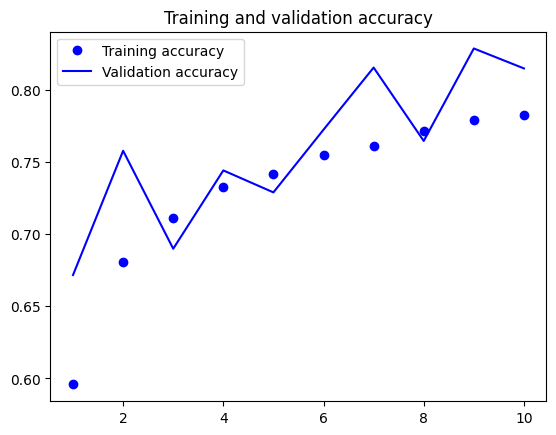

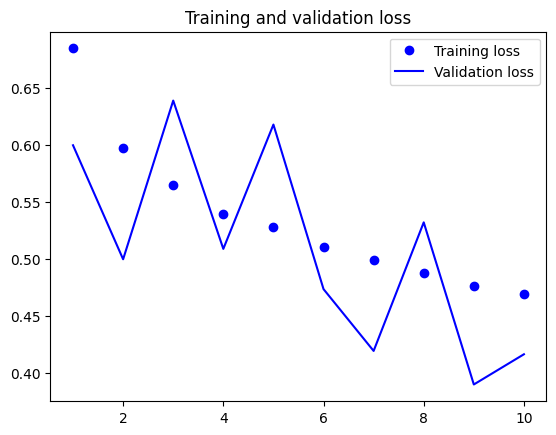

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot the accuracy curve
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot the loss curve
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.models import  load_model
from tensorflow.keras.preprocessing.image import  load_img, img_to_array
from PIL import Image


In [ ]:
test_dir = '/content/extracted/test1'
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 0 images belonging to 1 classes.


In [ ]:
# Load the test data
test_dir = '/content/extracted/test1'

test_imgs = os.listdir(test_dir)
test_imgs = [os.path.join(test_dir, img) for img in test_imgs]


# Load the trained model
model = load_model('/content/drive/MyDrive/CatVsDog Classfction/catdog_model.h5')

# Calculate the number of rows and columns needed to display all the images
num_cols = 4
num_rows = int(np.ceil(len(test_imgs) / num_cols))

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axs = axs.flatten()

# Loop over the test images
for i, img_path in enumerate(test_imgs):
    # Load the image and resize it
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Make the prediction and print the result
    prediction = model.predict(img_array)
    if prediction[0][0] < 0.5:
        label = 'cat'
    else:
        label = 'dog'

    # Display the image and label
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f'Prediction: {label}')

plt.show()

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 44ms/step


IsADirectoryError: ignored

Error in callback <function flush_figures at 0x7f71a7c593f0> (for post_execute):


KeyboardInterrupt: ignored